In [247]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd

# dataframe = pd.read_csv("/content/drive/MyDrive/EDC - MATERIAL + TPS/9 Bloco - IoT e Data Science/[PROJETO DE BLOCO] - Projeto de Bloco em IoT e Data Science/AT/room_temp_rawdata.csv")
dataframe = pd.read_csv("/content/drive/MyDrive/EDC - MATERIAL + TPS/9 Bloco - IoT e Data Science/[PROJETO DE BLOCO] - Projeto de Bloco em IoT e Data Science/AT/c5d0d4aa-29cc-4383-b194-2929210545ec.csv")
dataframe.rename(columns={"timestamp": "Timestamp", "temperature_celsius":"Temperature_Celsius"}, inplace=True)
dataframe.head()

,Timestamp,Temperature_Celsius,relative_humidity,__dt
0,2021-02-11 20:14:08,26.0,29.0,2022-04-08 00:00:00.000
1,2021-02-11 20:22:10,25.6,29.0,2022-04-08 00:00:00.000
2,2021-02-11 20:52:14,25.4,30.0,2022-04-08 00:00:00.000
3,2021-02-11 21:14:16,25.0,32.0,2022-04-08 00:00:00.000
4,2021-02-11 21:36:20,24.4,32.0,2022-04-08 00:00:00.000


In [41]:
dataframe = dataframe.fillna(0)

In [42]:
dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp']) 
dataframe['Timestamp']

0      2021-02-11 20:14:08
1      2021-02-11 20:22:10
2      2021-02-11 20:52:14
3      2021-02-11 21:14:16
4      2021-02-11 21:36:20
               ...        
9910   2021-01-22 13:53:14
9911   2021-01-22 13:59:17
9912   2021-01-22 14:05:19
9913   2021-01-22 14:13:21
9914   2021-01-22 14:21:22
Name: Timestamp, Length: 9915, dtype: datetime64[ns]

Text(0.5, 1.0, 'Timestamp')

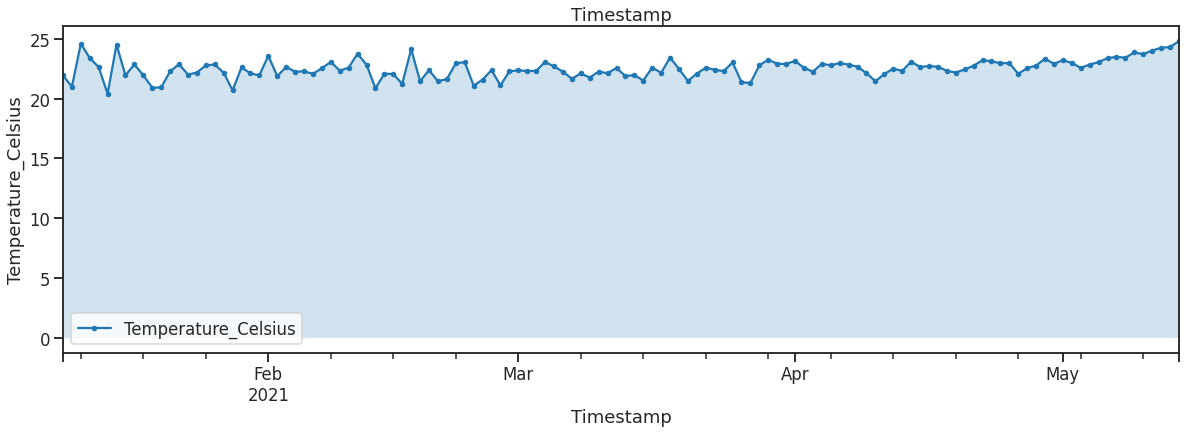

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

df = dataframe[['Timestamp', 'Temperature_Celsius']]
df.set_index('Timestamp', inplace=True)
df = df.resample('1D').mean()

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
df.plot(ax=ax, marker='.')
ax.fill_between(df.index, df['Temperature_Celsius'], alpha=.2)
ax.set_ylabel('Temperature_Celsius')
ax.set_title('Timestamp')

In [53]:
train = df[df.index  <= '2021-04-01']
test = df[df.index  > '2021-04-01']

In [54]:
train_prophet = train.reset_index().rename(columns={'Timestamp': 'ds', 'Temperature_Celsius': 'y'})
train_prophet.head()

,ds,y
0,2021-01-09,21.950000
1,2021-01-10,20.998333
2,2021-01-11,24.601351
3,2021-01-12,23.405063
4,2021-01-13,22.636923


In [55]:
from fbprophet import Prophet

model = Prophet()
model.fit(train_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future = model.make_future_dataframe(periods=test.size, freq="D")
forecast = model.predict(future)

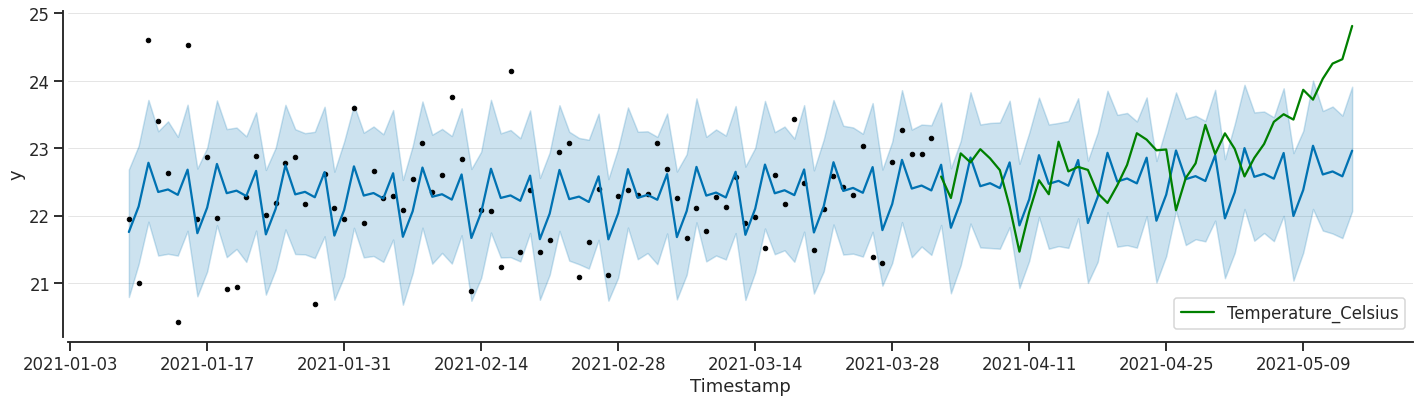

In [57]:
fig, ax= plt.subplots(1, 1, figsize=(20, 6))
sns.set_style("ticks")

sns.set_context("talk")
model.plot(forecast, ax=ax);

test.plot(ax=ax, c="g");
ax.yaxis.grid(True)

sns.despine(offset=5, trim=False)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

yhat_test = forecast.yhat[train.size:]

print(f"R2 Score: {r2_score(test, yhat_test)}")
print(f"MSE: {mean_squared_error(test, yhat_test)}")
print(f"RMSE: {mean_squared_error(test, yhat_test, squared=False)}")

R2 Score: -0.452627847746891
MSE: 0.6183337968401122
RMSE: 0.7863420355291406
